In [8]:
"""
to leverage on R functions in conda environment
"""
import os
os.environ['R_HOME'] = "C://Users//user//.conda//envs//base-geemap-mamba-v2//Lib//R"

import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

#Must be activated
pandas2ri.activate()

# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

import rpy2.robjects.lib.ggplot2 as gp

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [54]:
# Data manipulation

# for dataframe for up to 2D data structure
import pandas as pd
# to use sql syntax to handle and process pandas dataframe 
from pandasql import sqldf 

"""
# for multi-dimensional data structure analytics 
# can work with pandas for better multi-dimensional data structure  
"""
import numpy as np   

"""
Python Library for Low-Code Data Visualization 
"""
import seaborn as sns
import matplotlib.pyplot as plt


# to display important warning messages from Python
import warnings
warnings.filterwarnings('ignore')

In [10]:
eda_ppi = pd.read_csv("C://Users//user//Downloads//ppi.csv")

In [11]:
eda_ppi_t = eda_ppi.transpose()

In [12]:
eda_ppi_tt = eda_ppi.transpose().transpose().describe(include = 'all')

In [13]:
eda_ppi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           170 non-null    object 
 1   overall        170 non-null    float64
 2   agriculture    170 non-null    float64
 3   mining         170 non-null    float64
 4   manufacturing  170 non-null    float64
 5   electricity    170 non-null    float64
 6   water          170 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.4+ KB


In [14]:
eda_ppi_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, date to water
Columns: 170 entries, 0 to 169
dtypes: object(170)
memory usage: 9.6+ KB


In [15]:
eda_ppi_tt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, count to freq
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4 non-null      object 
 1   overall        4 non-null      float64
 2   agriculture    4 non-null      float64
 3   mining         4 non-null      float64
 4   manufacturing  4 non-null      float64
 5   electricity    4 non-null      float64
 6   water          4 non-null      float64
dtypes: float64(6), object(1)
memory usage: 256.0+ bytes


In [16]:
eda_ppi.head()

,date,overall,agriculture,mining,manufacturing,electricity,water
0,2010-01-01,98.4,92.7,99.4,98.8,99.8,99.2
1,2010-02-01,98.4,93.3,97.8,99.0,99.4,99.1
2,2010-03-01,99.9,96.1,108.6,99.2,100.5,99.2
3,2010-04-01,99.8,95.3,107.7,99.3,99.7,99.9
4,2010-05-01,98.6,94.1,91.4,99.8,100.3,101.5


In [17]:
eda_ppi.tail()

,date,overall,agriculture,mining,manufacturing,electricity,water
165,2023-10-01,119.0,121.6,103.9,120.7,117.5,118.6
166,2023-11-01,118.2,123.2,99.0,120.1,117.3,118.8
167,2023-12-01,118.0,123.2,97.4,120.0,117.0,118.3
168,2024-01-01,117.9,125.7,96.7,119.8,117.1,118.7
169,2024-02-01,118.7,129.0,102.2,119.8,118.1,121.9


In [18]:
eda_ppi.describe()

,overall,agriculture,mining,manufacturing,electricity,water
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,108.711176,110.570588,105.117647,108.820000,112.990588,110.440588
std,6.424375,19.048057,25.186752,5.833748,5.907064,5.175448
min,98.400000,87.300000,44.700000,98.800000,99.400000,99.100000
25%,104.175000,94.925000,92.025000,105.700000,108.300000,106.325000
50%,107.850000,107.100000,100.250000,107.450000,115.650000,111.900000
75%,113.200000,121.675000,122.875000,109.900000,117.175000,114.175000
max,124.100000,178.700000,157.200000,122.800000,123.300000,121.900000


In [19]:
type(eda_ppi)

pandas.core.frame.DataFrame

In [20]:
type(eda_ppi_t)

pandas.core.frame.DataFrame

In [21]:
# #converts values in df into string 
# eda_ppi_2 = eda_ppi_2.applymap(str)
# # Double check that values have changed
# print(type(eda_ppi_2['In_Final_Phase_Variant_Calling'][0]))

In [22]:
# Number of dimension of this dataset
eda_ppi.ndim

2

In [148]:
# Convert the date column to date format
eda_ppi_2 = eda_ppi.copy()
eda_ppi_2["date"] = pd.to_datetime(eda_ppi_2["date"])
eda_ppi_2.head()

,date,overall,agriculture,mining,manufacturing,electricity,water
0,2010-01-01,98.4,92.7,99.4,98.8,99.8,99.2
1,2010-02-01,98.4,93.3,97.8,99.0,99.4,99.1
2,2010-03-01,99.9,96.1,108.6,99.2,100.5,99.2
3,2010-04-01,99.8,95.3,107.7,99.3,99.7,99.9
4,2010-05-01,98.6,94.1,91.4,99.8,100.3,101.5


In [149]:
eda_ppi_2.describe(include = 'all')

,date,overall,agriculture,mining,manufacturing,electricity,water
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,2017-01-15 02:57:52.941176576,108.711176,110.570588,105.117647,108.820000,112.990588,110.440588
min,2010-01-01 00:00:00,98.400000,87.300000,44.700000,98.800000,99.400000,99.100000
25%,2013-07-08 18:00:00,104.175000,94.925000,92.025000,105.700000,108.300000,106.325000
50%,2017-01-16 12:00:00,107.850000,107.100000,100.250000,107.450000,115.650000,111.900000
75%,2020-07-24 06:00:00,113.200000,121.675000,122.875000,109.900000,117.175000,114.175000
max,2024-02-01 00:00:00,124.100000,178.700000,157.200000,122.800000,123.300000,121.900000
std,NaN,6.424375,19.048057,25.186752,5.833748,5.907064,5.175448


In [150]:
eda_ppi_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           170 non-null    datetime64[ns]
 1   overall        170 non-null    float64       
 2   agriculture    170 non-null    float64       
 3   mining         170 non-null    float64       
 4   manufacturing  170 non-null    float64       
 5   electricity    170 non-null    float64       
 6   water          170 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 9.4 KB


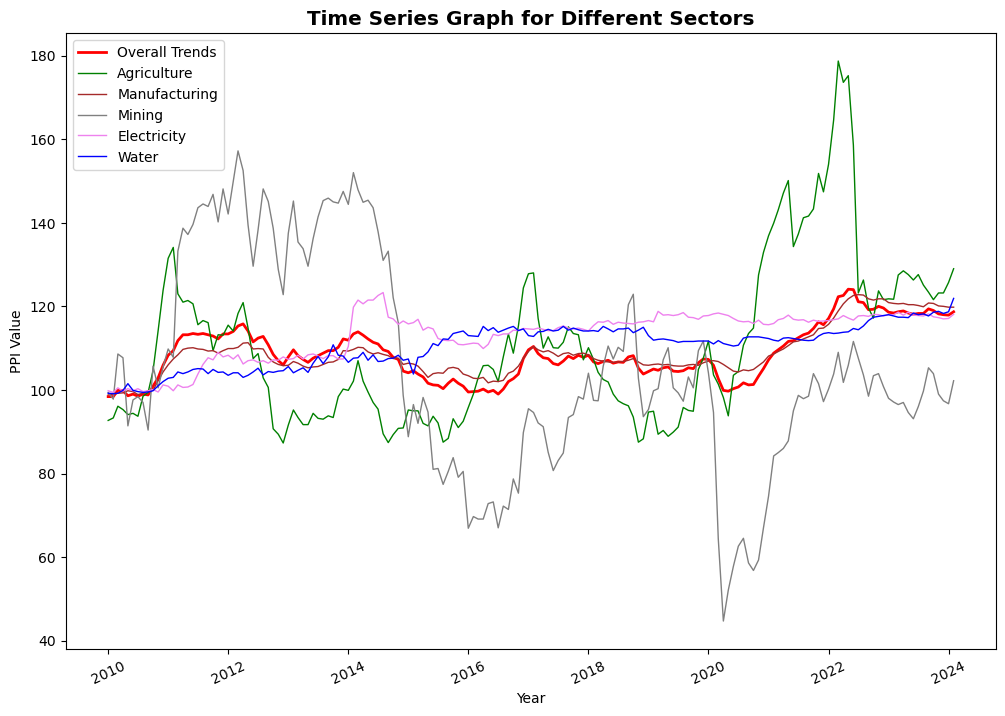

In [55]:
# create the time series plot 
plt.figure(figsize=(12,8))
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', linewidth=2, color="red")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['agriculture'], label='Agriculture', linewidth=1, color="green")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['manufacturing'], label='Manufacturing', linewidth=1, color="brown")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['mining'], label='Mining', linewidth=1, color="grey")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['electricity'], label='Electricity', linewidth=1, color="violet")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['water'], label='Water', linewidth=1, color="blue")
plt.ylabel("PPI Value") 
plt.xlabel("Year")
plt.title('Time Series Graph for Different Sectors', fontsize = 'x-large', fontweight = 'bold')
plt.xticks(rotation = 25)
plt.show()

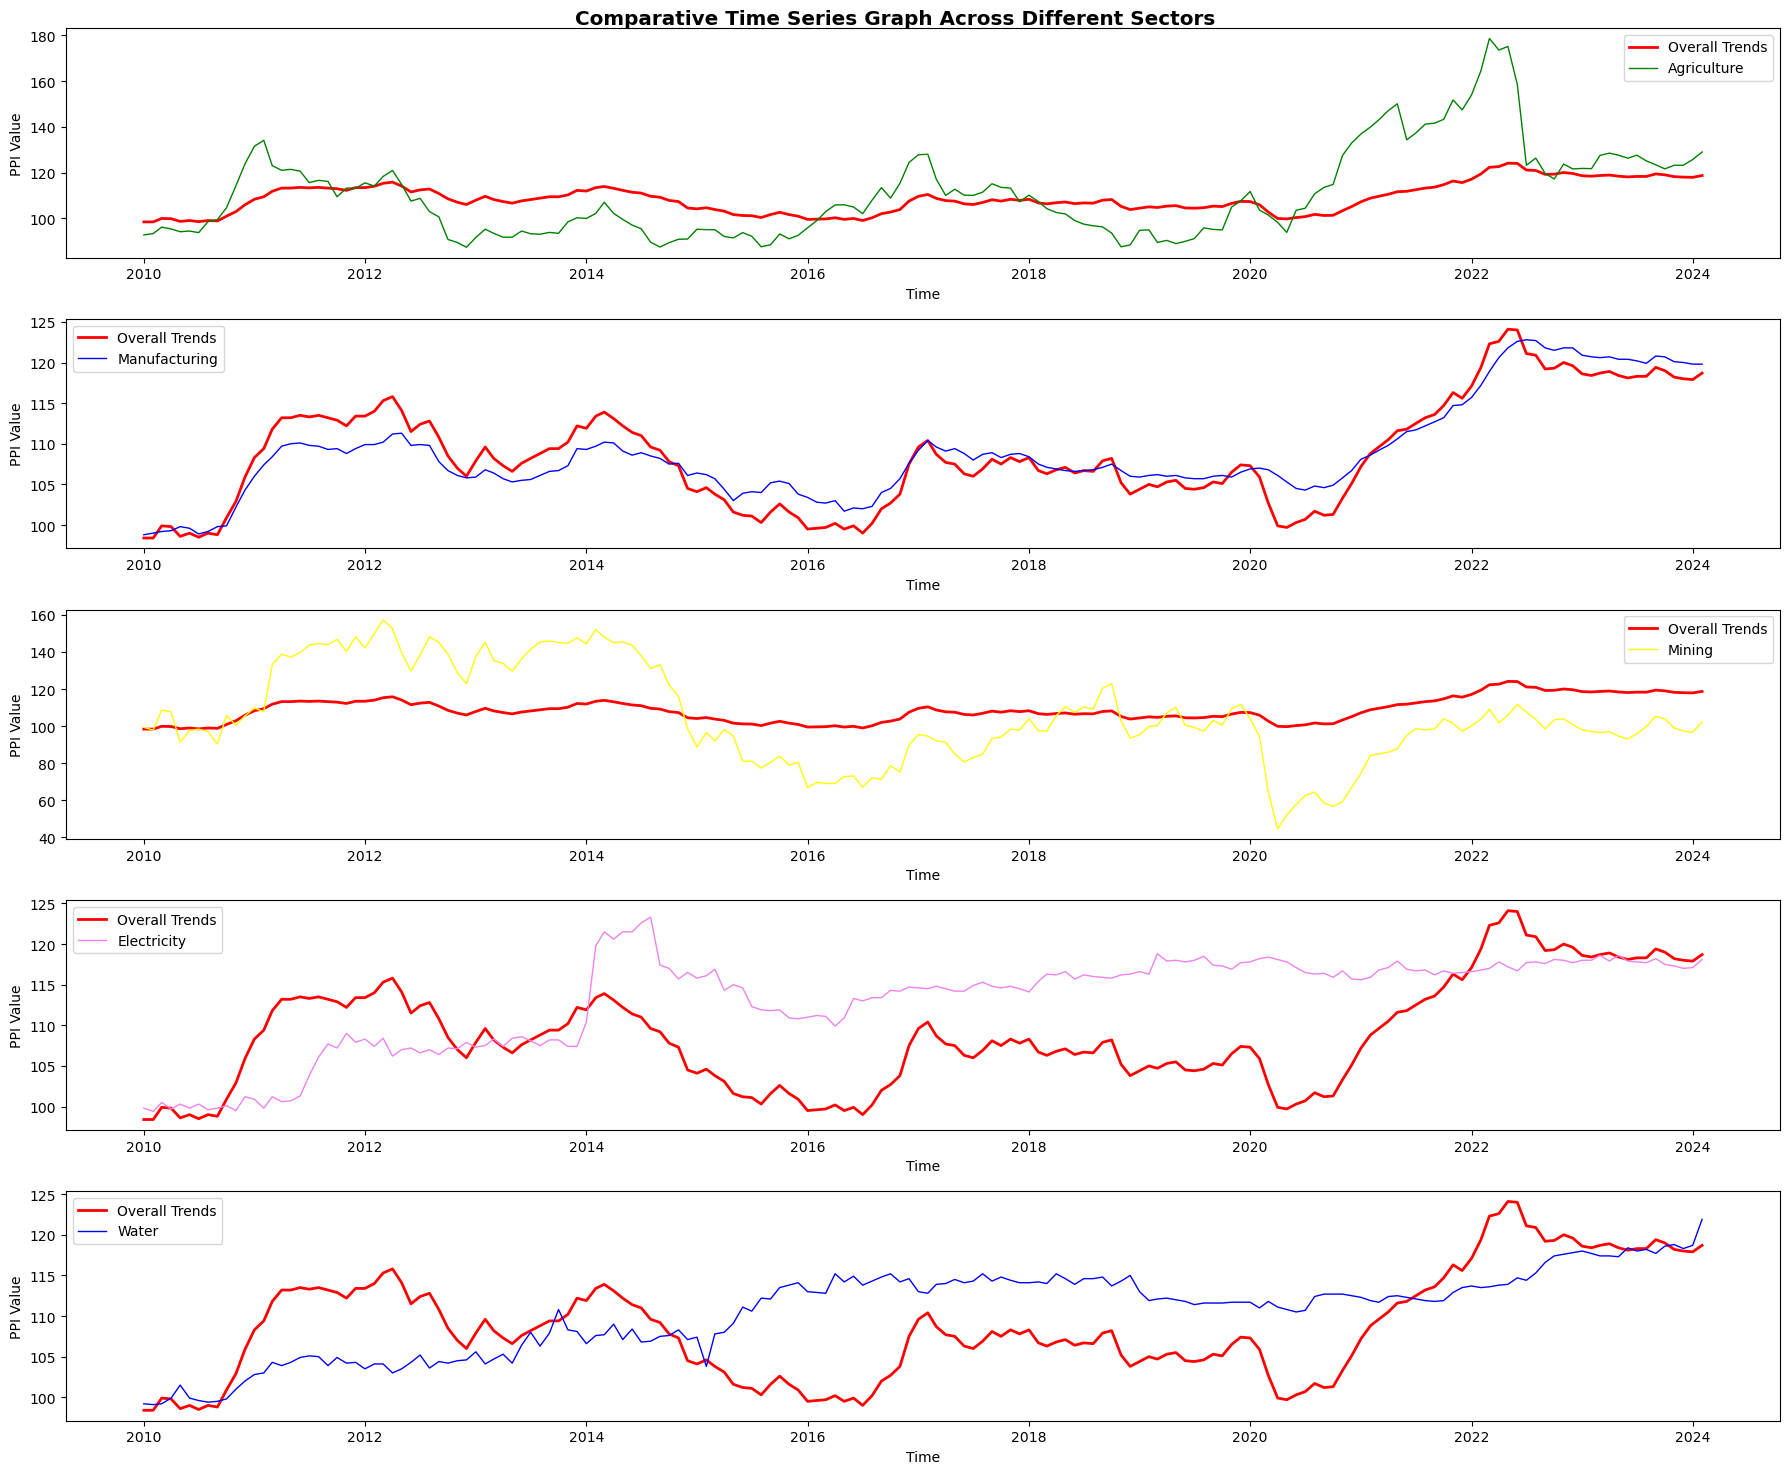

In [155]:
# Set the date column as the index
eda_ppi_2.set_index('date', inplace=False)

# Create subplots with 5 rows and 1 column
fig, ax = plt.subplots(5, 1, figsize=(18, 15))
fig.suptitle('Comparative Time Series Graph Across Different Sectors', fontsize='x-large', fontweight='bold')

# Overall and Agriculture
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[0], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['agriculture'], label='Agriculture', ax=ax[0], color='green', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PPI Value')

# Overall and Manufacturing
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[1], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['manufacturing'], label='Manufacturing', ax=ax[1], color='blue', linewidth=1)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('PPI Value')

# Overall and Mining
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[2], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['mining'], label='Mining', ax=ax[2], color='yellow', linewidth=1)
ax[2].set_xlabel('Time')
ax[2].set_ylabel('PPI Value')

# Overall and Electricity
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[3], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['electricity'], label='Electricity', ax=ax[3], color='violet', linewidth=1)
ax[3].set_xlabel('Time')
ax[3].set_ylabel('PPI Value')

# Overall and Water
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[4], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['water'], label='Water', ax=ax[4], color='blue', linewidth=1)
ax[4].set_xlabel('Time')
ax[4].set_ylabel('PPI Value')

plt.tight_layout()
plt.show()

In [151]:
eda_ppi_2.head()

,date,overall,agriculture,mining,manufacturing,electricity,water
0,2010-01-01,98.4,92.7,99.4,98.8,99.8,99.2
1,2010-02-01,98.4,93.3,97.8,99.0,99.4,99.1
2,2010-03-01,99.9,96.1,108.6,99.2,100.5,99.2
3,2010-04-01,99.8,95.3,107.7,99.3,99.7,99.9
4,2010-05-01,98.6,94.1,91.4,99.8,100.3,101.5


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# 
# def plot_comparative_time_series(df, sectors, colors, linewidths, figsize=(18, 15), suptitle='Comparative Time Series Graph Across Different Sectors'):
#     """
#     Plots a comparative time series graph for different sectors against an 'overall' trend.
# 
#     Parameters:
#         df (pd.DataFrame): The DataFrame containing the time series data.
#         sectors (list of str): Column names in the DataFrame that represent different sectors to plot against 'overall'.
#         colors (list of str): Colors for each line plot corresponding to each sector.
#         linewidths (list of int): Line widths for each sector plot.
#         figsize (tuple): Figure size as a tuple (width, height).
#         suptitle (str): Title for the entire plot.
#     """
#     # Set the date column as the index for plotting
#     df_indexed = df.set_index('date')
#     
#     # Create subplots with one row for each sector
#     fig, axs = plt.subplots(len(sectors), 1, figsize=figsize)
#     fig.suptitle(suptitle, fontsize='x-large', fontweight='bold')
# 
#     # Loop through the axes and sectors to plot each one
#     for ax, sector, color, linewidth in zip(axs, sectors, colors, linewidths):
#         # Capitalize the first character of each word in the sector name
#         sector_label = sector.title()
#         sns.lineplot(x=df_indexed.index, y=df_indexed['overall'], label='Overall Trends', ax=ax, color='red', linewidth=2)
#         sns.lineplot(x=df_indexed.index, y=df_indexed[sector], label=sector_label, ax=ax, color=color, linewidth=linewidth)
#         ax.set_xlabel('Time')
#         ax.set_ylabel('PPI Value')
# 
#     plt.tight_layout()
#     plt.show()
# 
# # Example usage:
# # Assuming 'eda_ppi_2' is your DataFrame and it is loaded with the necessary data including a 'date' column and sector columns
# sectors = ['manufacturing', 'mining', 'agriculture', 'electricity', 'water']
# colors = ['green', 'blue', 'yellow', 'violet', 'blue']
# linewidths = [1, 1, 1, 1, 1]
# plot_comparative_time_series(eda_ppi_2, sectors, colors, linewidths)

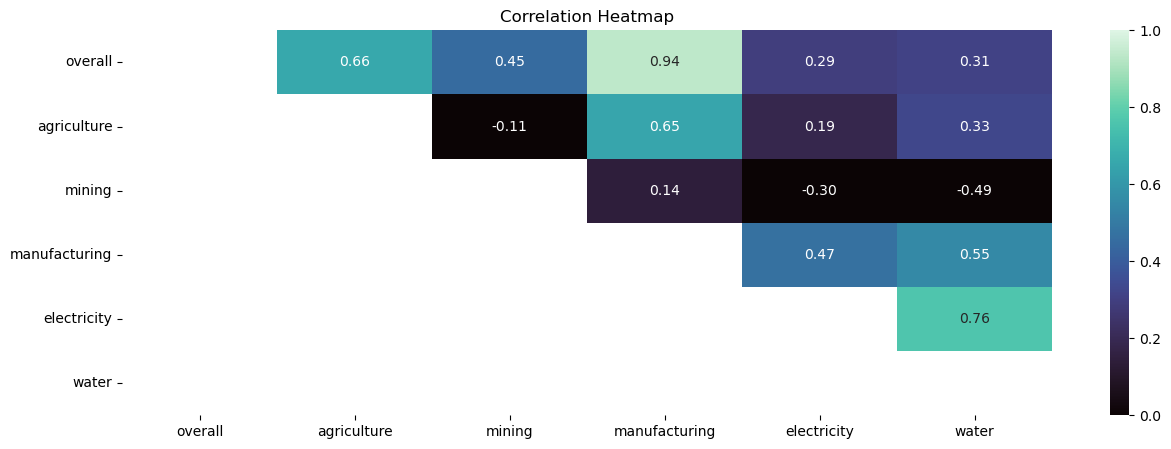

In [156]:
eda_ppi_3 = eda_ppi_2.copy()
eda_ppi_3 = eda_ppi_3.drop(columns = ['date'])

# Calculate the correlation matrix
correlation_matrix = eda_ppi_3.corr().round(3)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 5))

# Generate a mask that covers the lower triangle of the correlation matrix
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with an explicit format string for annotations
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="mako", fmt=".2f", vmax=1.0, vmin = 0.0, center=0.5)
plt.title('Correlation Heatmap')
plt.show()

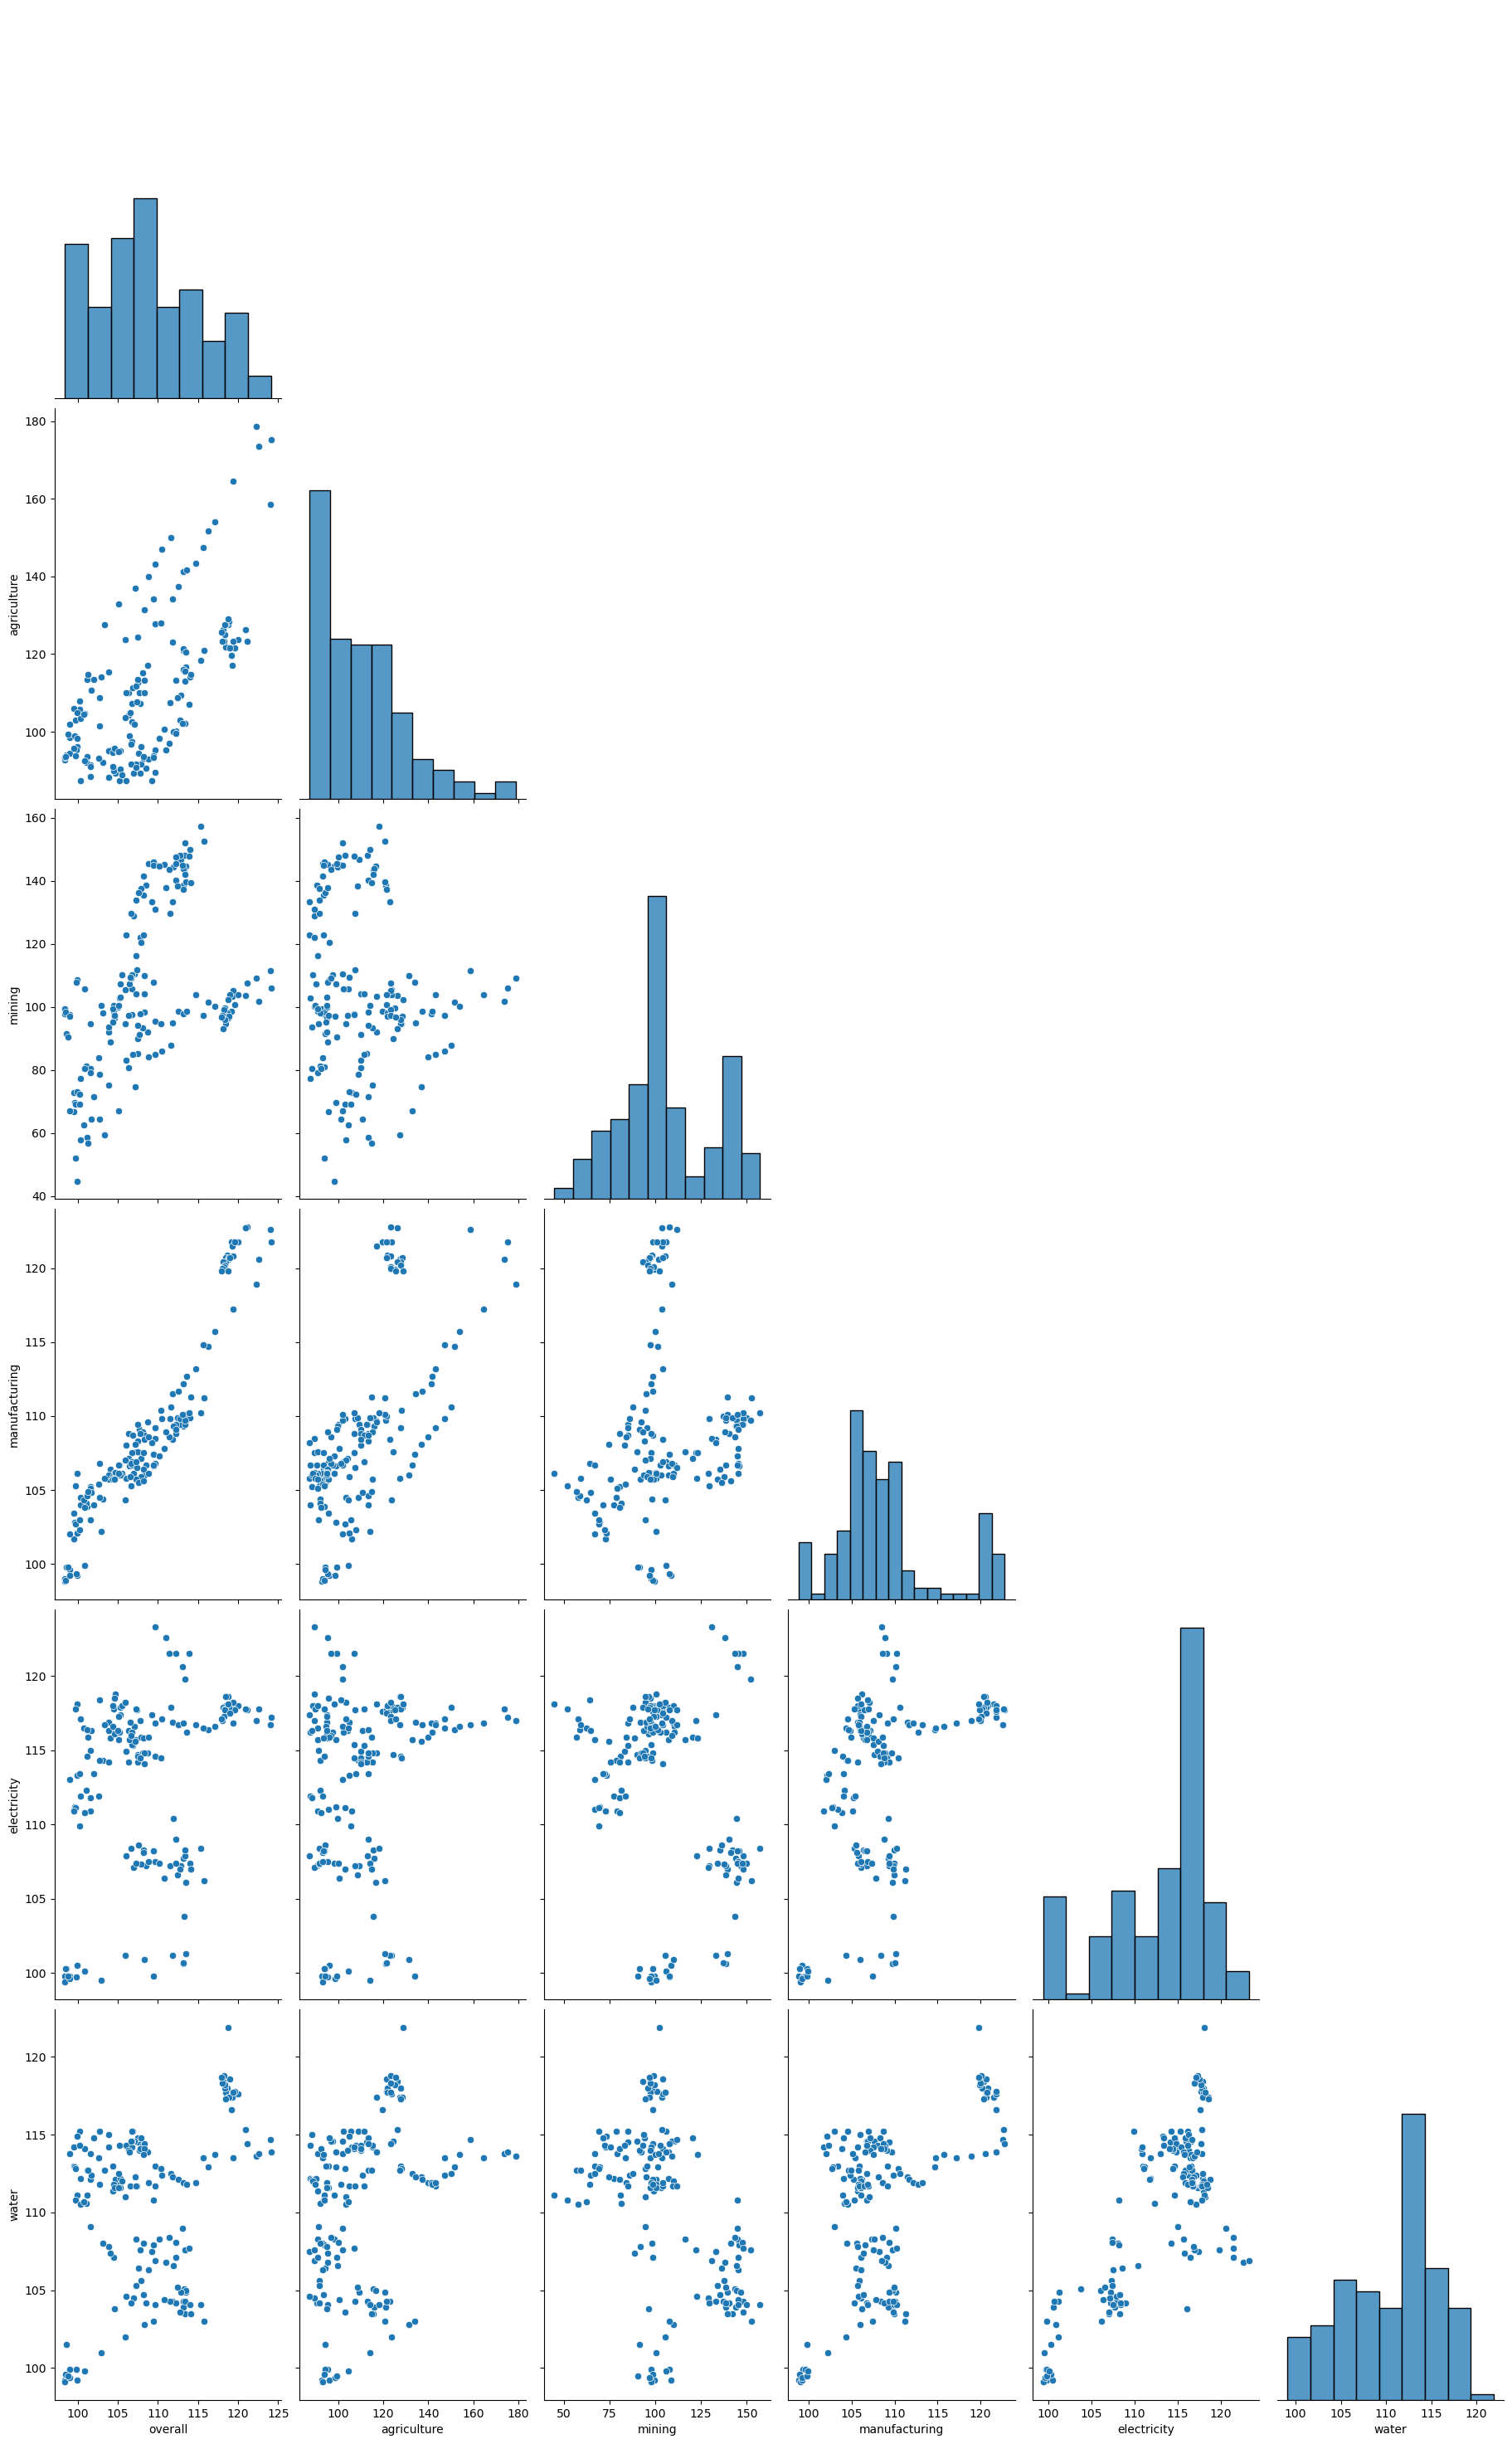

In [170]:
pairplot = sns.pairplot(eda_ppi, corner = True, height=5 , aspect=1/1.618)

In [95]:
# Assuming df is your DataFrame and 'column' is the column you're examining
Q1 = eda_ppi['agriculture'].quantile(0.25)
Q3 = eda_ppi['agriculture'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = eda_ppi[(eda_ppi['agriculture'] < lower_bound) | (eda_ppi['agriculture'] > upper_bound)] 
outliers

,date,overall,agriculture,mining,manufacturing,electricity,water
145,2022-02-01,119.4,164.6,103.8,117.2,116.8,113.5
146,2022-03-01,122.3,178.7,109.0,118.9,117.0,113.6
147,2022-04-01,122.6,173.6,101.8,120.6,117.8,113.8
148,2022-05-01,124.1,175.2,105.9,121.8,117.2,113.9


## Anomaly Detection on Time Series Producer Price Index (PPI) Data using Z-Score Method

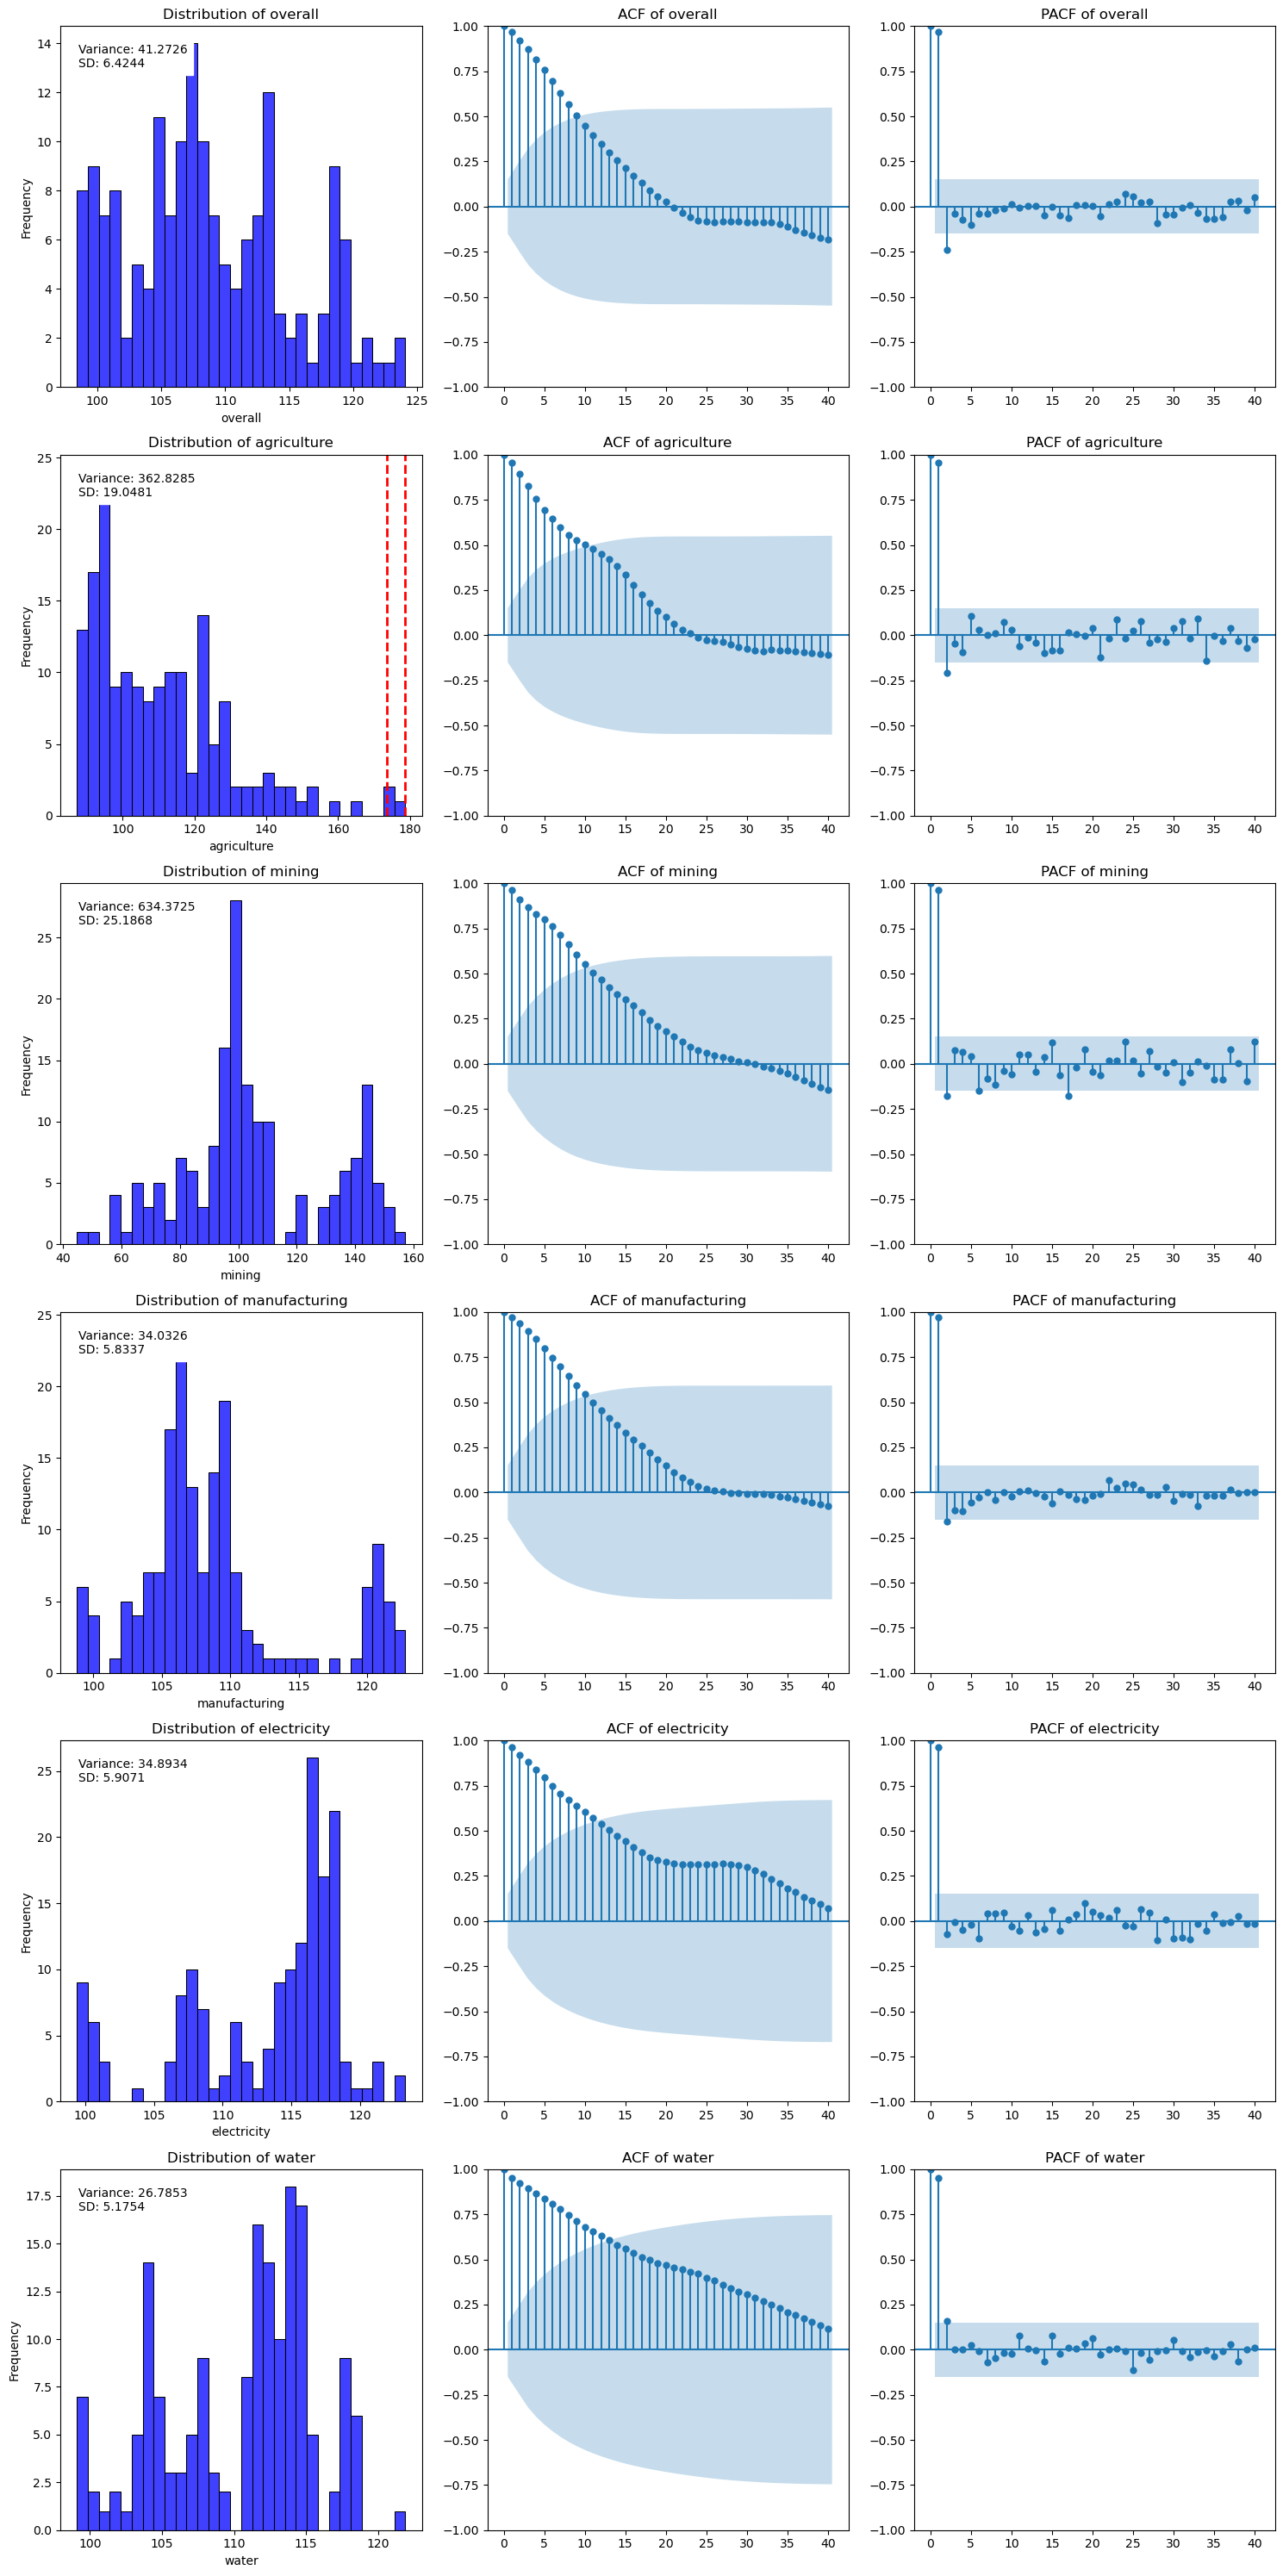

In [131]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def detect_and_plot_histograms_acf_pacf(df, columns, threshold=3):
    """
    Detects outliers in specified columns of a pandas DataFrame using the z-score method,
    plots histograms of the distributions, highlights the threshold for outliers,
    and plots ACF and PACF for each column. Annotates each histogram plot with the variance and standard deviation.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns (list of str): List of column names to analyze.
    threshold (float): The z-score value to use as a threshold for identifying outliers.
    """
    num_columns = len(columns)
    nrows = num_columns  # One row per column now since we need more space for ACF and PACF
    ncols = 3            # One for histogram, one for ACF, and one for PACF
    
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows), squeeze=False)
    
    for i, column in enumerate(columns):
        # Histogram
        ax_hist = axs[i, 0]
        
        # Calculate z-scores
        df['z_scores'] = stats.zscore(df[column].dropna())
        df['Outlier'] = np.abs(df['z_scores']) > threshold
        outliers = df[df['Outlier']]
        
        # Calculate variance and standard deviation
        variance = df[column].var(ddof=1)
        std_dev = df[column].std(ddof=1)
        
        # Plotting histogram
        sns.histplot(df[column], bins=30, kde=False, ax=ax_hist, color='blue')
        if not outliers.empty:
            ax_hist.axvline(x=outliers[column].min(), color='red', linestyle='dashed', linewidth=2)
            ax_hist.axvline(x=outliers[column].max(), color='red', linestyle='dashed', linewidth=2)
        
        ax_hist.set_title(f'Distribution of {column}')
        ax_hist.set_xlabel(column)
        ax_hist.set_ylabel('Frequency')

        # Annotate the histogram with variance and standard deviation
        ax_hist.annotate(f'Variance: {variance:.4f}\nSD: {std_dev:.4f}', xy=(0.05, 0.95), xycoords='axes fraction',
                         horizontalalignment='left', verticalalignment='top', fontsize=10, backgroundcolor='white')

        # ACF Plot
        ax_acf = axs[i, 1]
        plot_acf(df[column].dropna(), ax=ax_acf, lags=40)
        ax_acf.set_title(f'ACF of {column}')

        # PACF Plot
        ax_pacf = axs[i, 2]
        plot_pacf(df[column].dropna(), ax=ax_pacf, lags=40)
        ax_pacf.set_title(f'PACF of {column}')

        # Remove temporary columns for z-scores and outliers
        df.drop(columns=['z_scores', 'Outlier'], inplace=True)
    
    plt.tight_layout()
    plt.show()

# Usage example:
columns_to_check = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity', 'water']
detect_and_plot_histograms_acf_pacf(eda_ppi_3, columns_to_check)

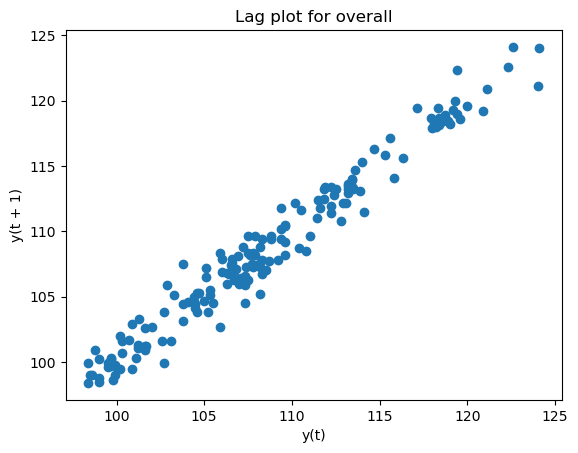

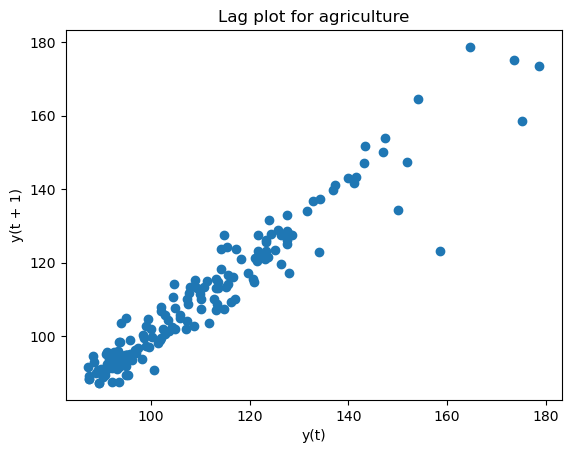

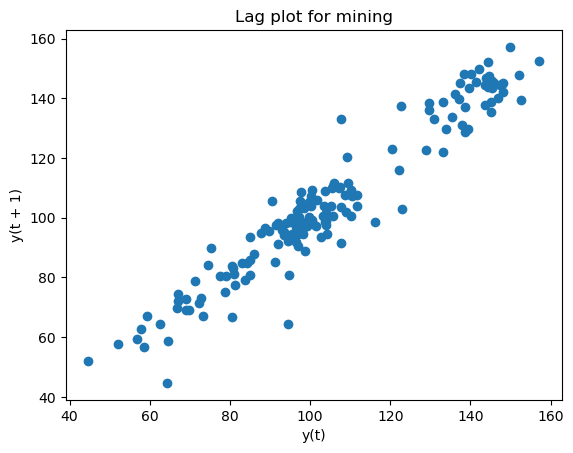

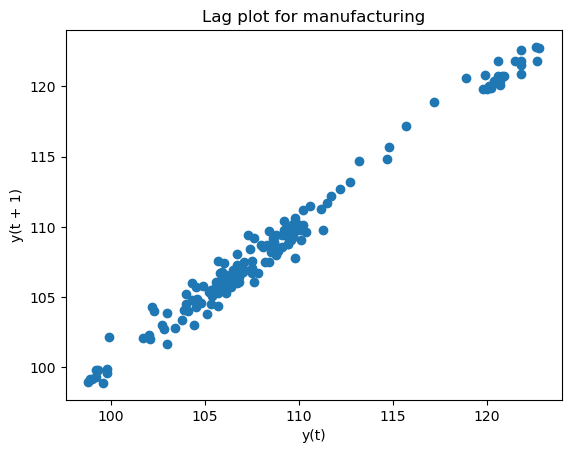

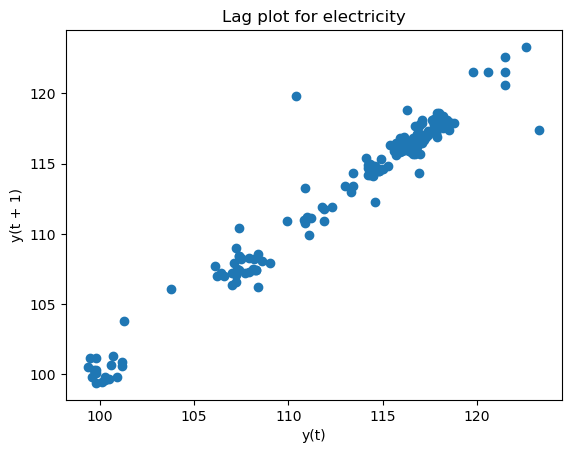

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Assuming eda_ppi is your DataFrame
columns = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity']

for column in columns:
    plt.figure()
    lag_plot(eda_ppi[column])
    plt.title(f'Lag plot for {column}')

In [79]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

NameError: name 'iqr' is not defined

KeyboardInterrupt: 

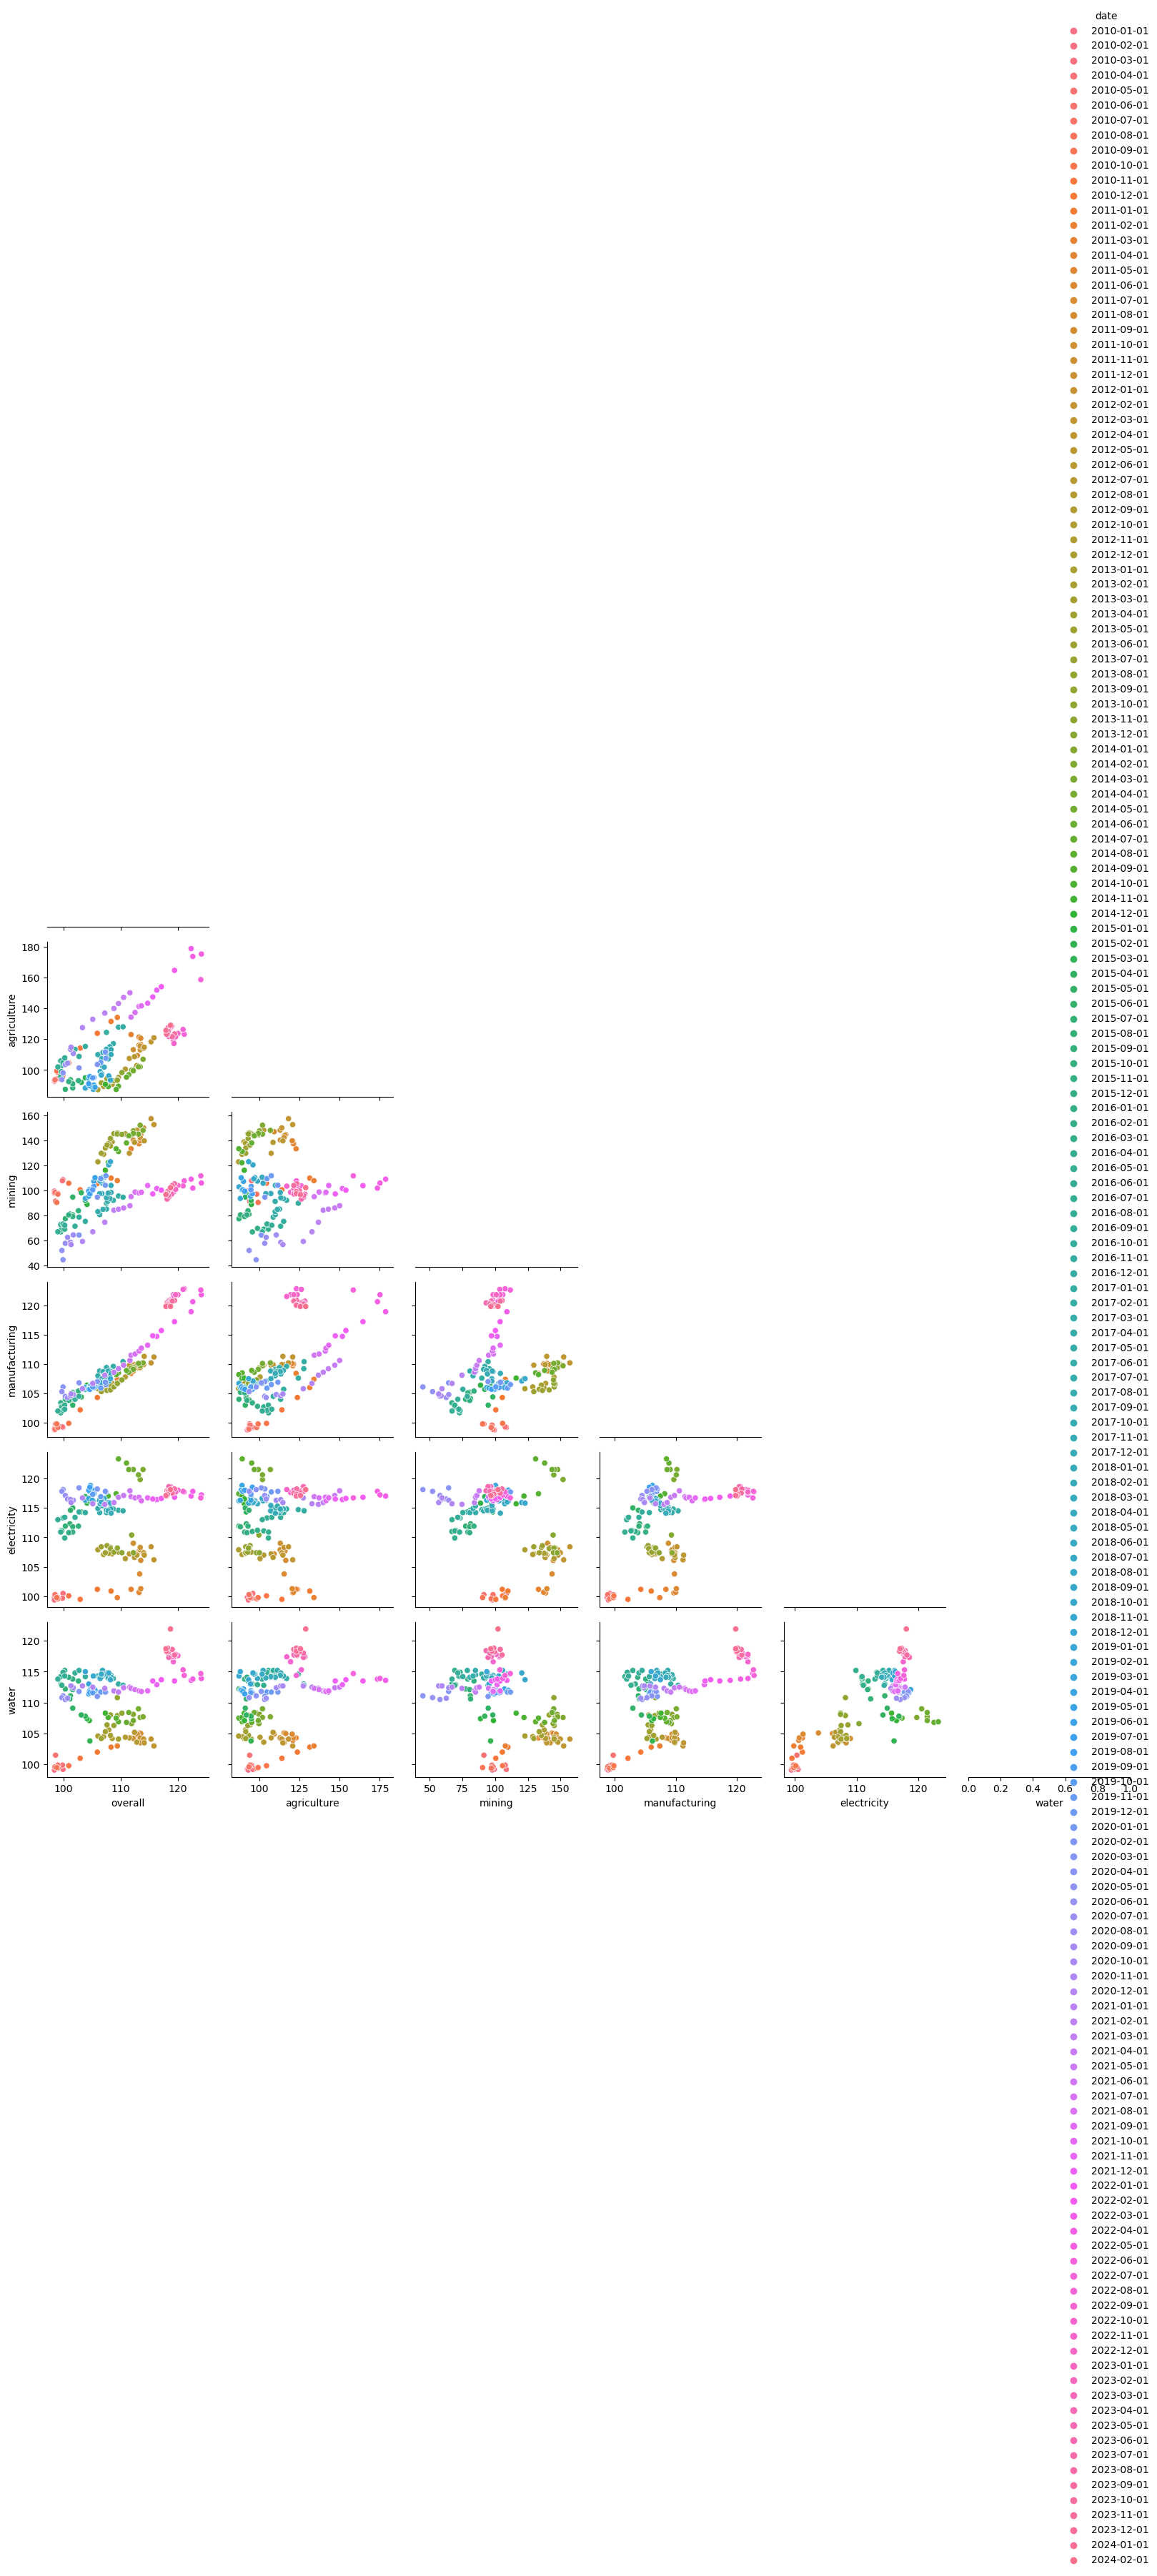

In [71]:
pairplot = sns.pairplot(eda_ppi, diag_kind = 'kde', corner = True, hue = 'date')

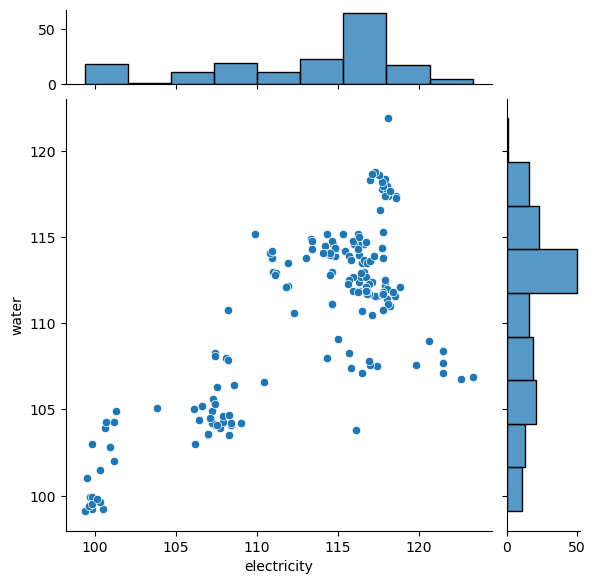

In [64]:
g = sns.JointGrid(data=eda_ppi, x="electricity", y="water", marginal_ticks=True
                  #hue="date"
                  )
g.plot(sns.scatterplot, sns.histplot)

<Axes: xlabel='water', ylabel='electricity'>

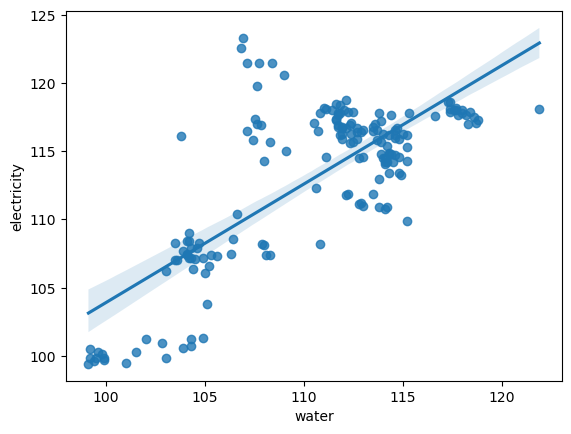

In [29]:
sns.regplot(data=eda_ppi_tt, x=eda_ppi['water'], y=eda_ppi['electricity'])

In [30]:
"""
to leverage on R functions in conda environment
"""
import os
os.environ['R_HOME'] = "C://Users//user//.conda//envs//base-geemap-mamba-v2//Lib//R"

"""
to call existing R functions from python using appropriate packages
"""
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
#Must be activated
pandas2ri.activate()

In [31]:
time_series=robjects.r('ts')
forecast_package=importr('forecast')

PackageNotInstalledError: The R package "forecast" is not installed.

In [ ]:

print(rpy2.__version__)
print(rpy2.__path__)

print(rpy2.ipython)

In [ ]:
import rpy2.ipython # for using R in Jupyter notebook

In [ ]:
stats = importr('stats')
base = importr('base')

In [ ]:
# Assuming rpy2.ipython is installed and loaded
%load_ext rpy2.ipython

In [ ]:
# Pass Python variables to R
%R -i eda_ppi

In [ ]:
import rpy2.robjects.lib.ggplot2 as gp

In [ ]:
%R -i head(eda_ppi)

In [ ]:
# Plotting in R
%R -i head(eda_ppi)